# 3-8 문제 해설(QCS)

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

양자 컴퓨팅 구현을 위한 기본 설정이다.

In [4]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

밑의 연산들을 수행하기 위해서 기본설정을 추가하였다.

In [11]:
qc = QuantumCircuit(10)
qc.h(2)
qc.cp(pi/2, 1, 2)
qc.cp(pi/4, 0, 2)
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)

문제에서 언급한것과 같이 10큐비트를 설정하라고 하였기 때문에 첫줄에 10큐비트를 나오게 설정하였다.

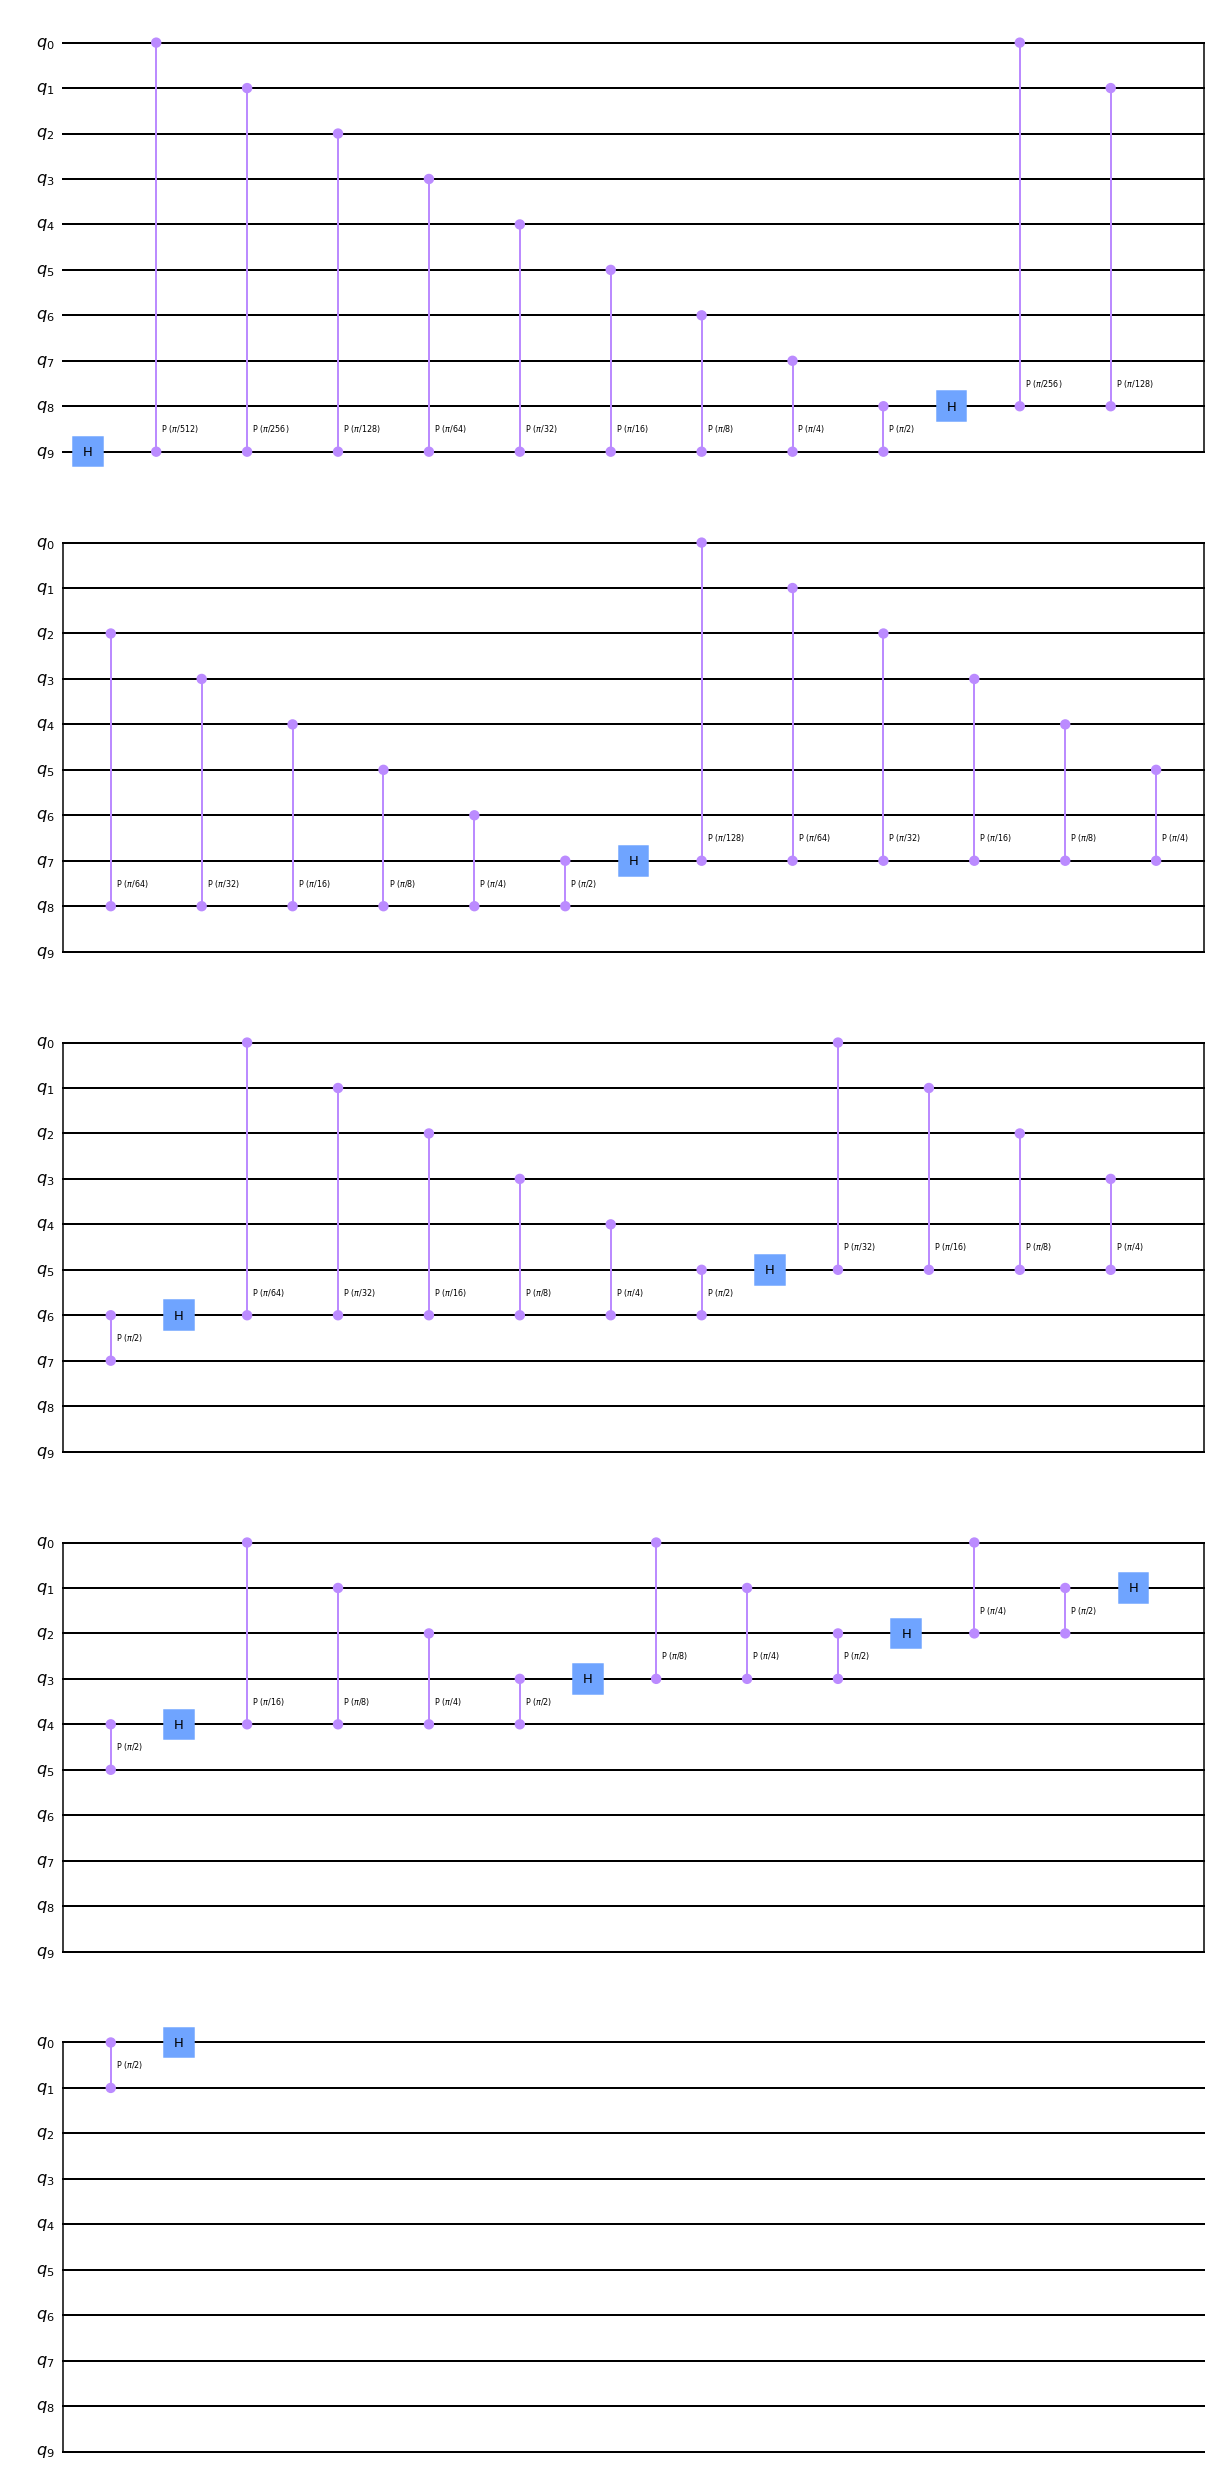

In [12]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(10)
qft_rotations(qc,10)
qc.draw()


위에 코드들은 ibm qiskit textbook을 기초로 하여서 작성한 코드이다.
10큐비트로 바뀌었으므로 QuantumCircuit(10), qft_rotations(qc,10) <- 10을 작성하여서 구현하도록 하였고 위 그림은 그에 따른 결과이다.

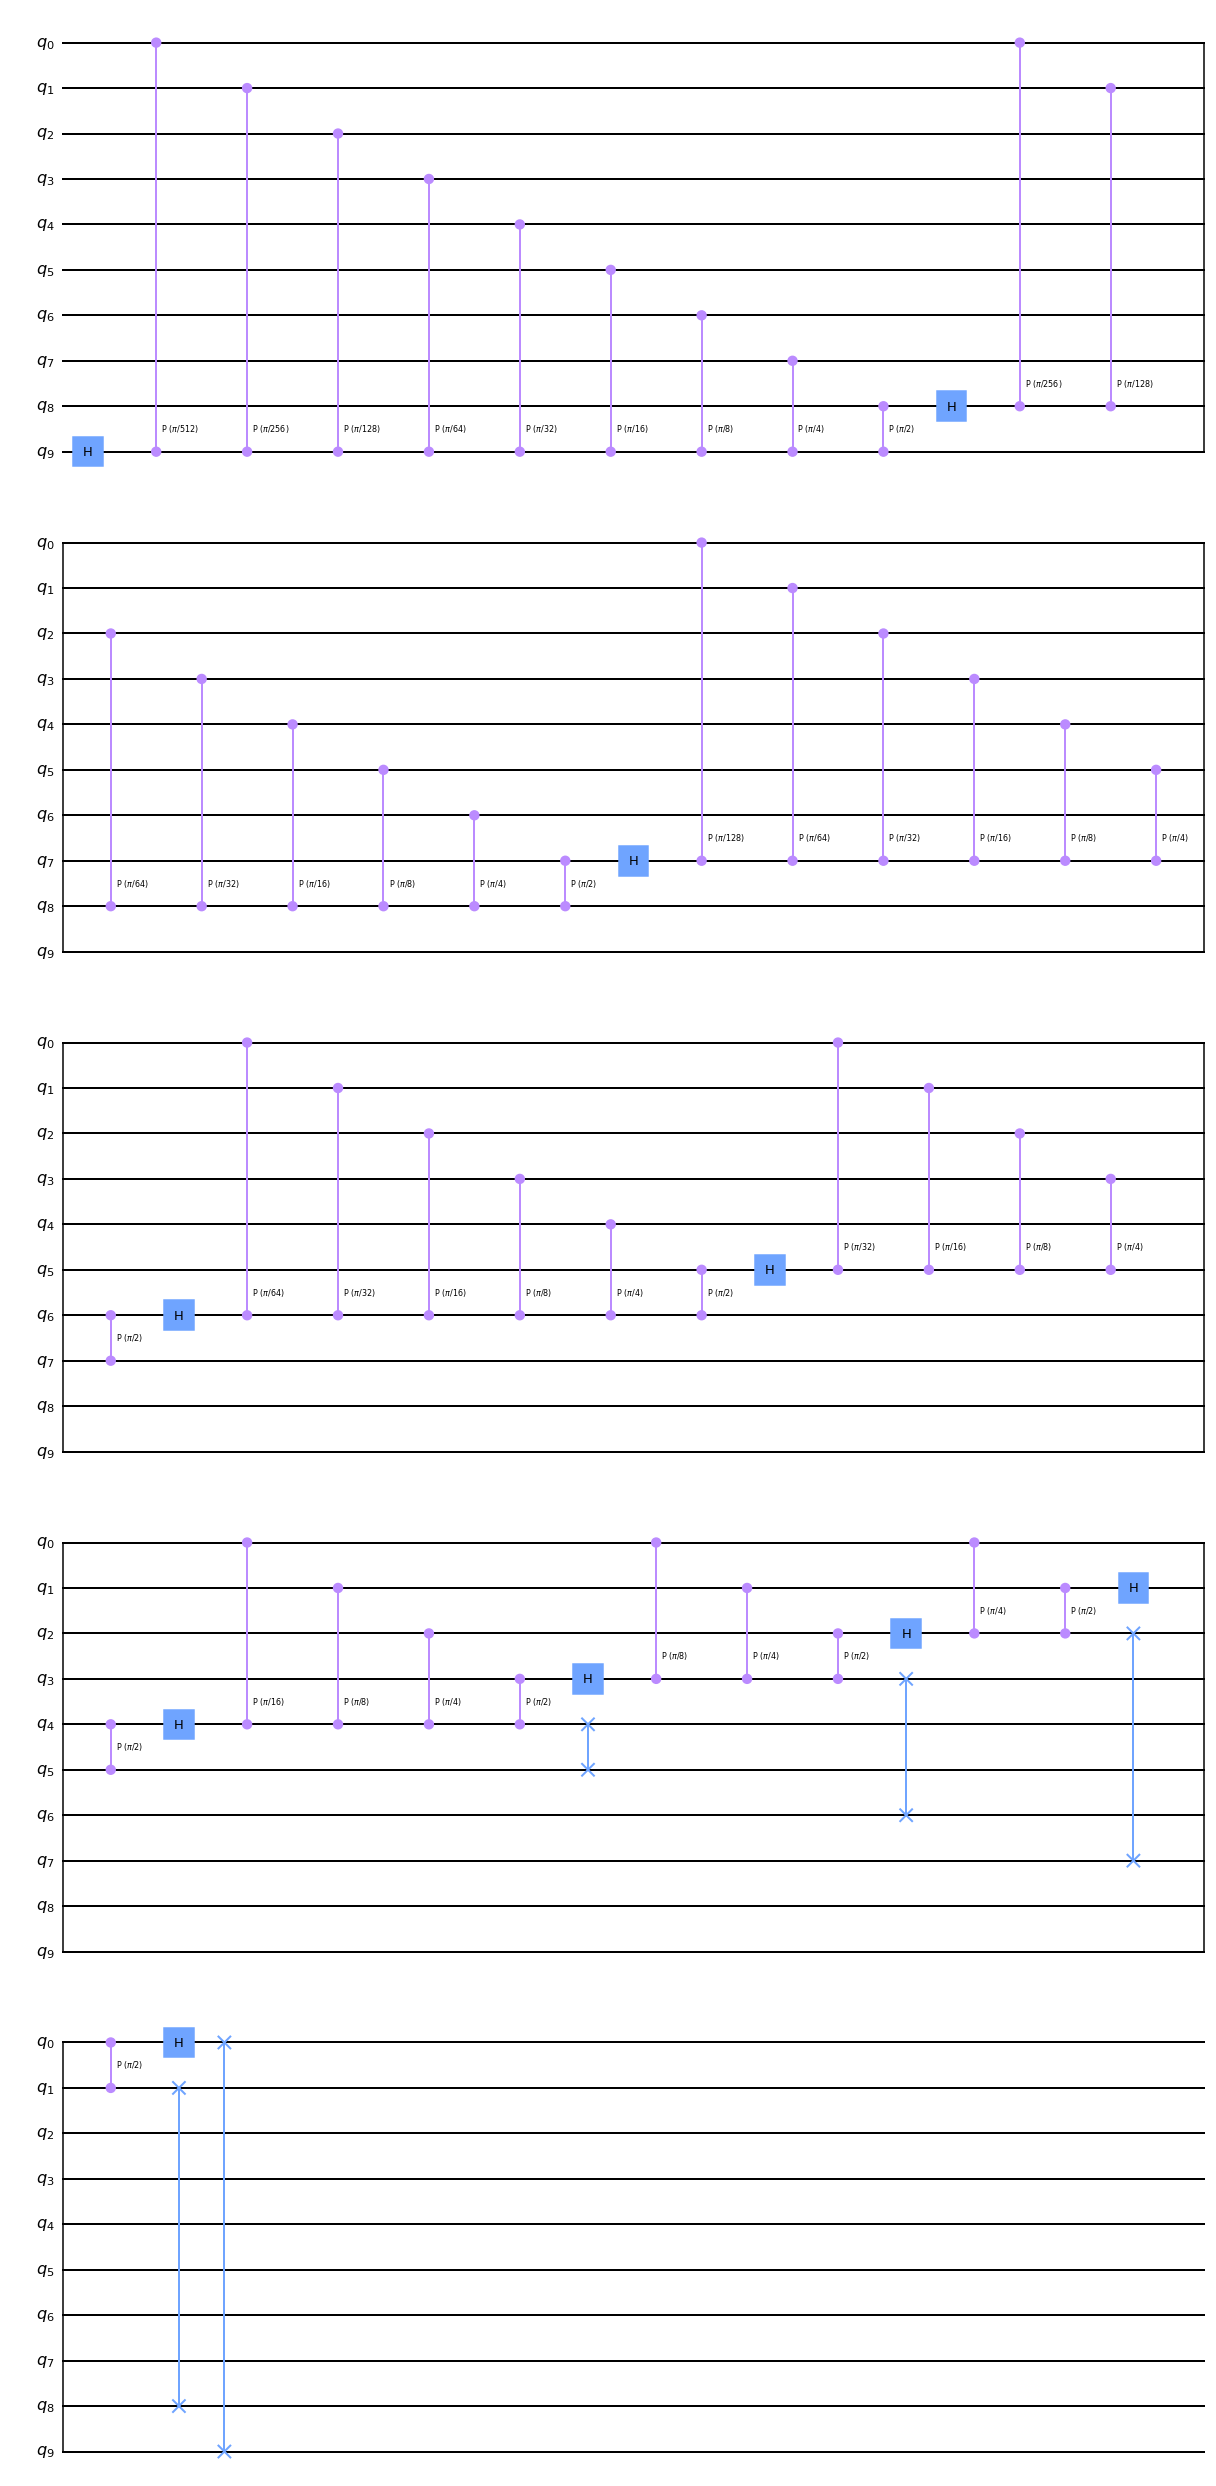

In [13]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(10)
qft(qc,10)
qc.draw()

위에 코드들은 ibm qiskit textbook을 기초로 하여서 작성한 코드이다.
10큐비트로 바뀌었으므로 QuantumCircuit(10), qft(qc,10) <- 10을 작성하여서 10큐비트를 구현하도록 하였고 위 그림은 그에 따른 결과이다.

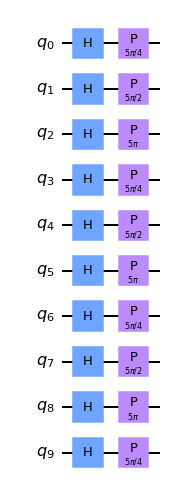

In [14]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates
nqubits = 10
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)
qc.p(number*pi/4,3)
qc.p(number*pi/2,4)
qc.p(number*pi,5)
qc.p(number*pi/4,6)
qc.p(number*pi/2,7)
qc.p(number*pi,8)
qc.p(number*pi/4,9)

qc.draw()

In [ ]:
위에 코드들은 ibm qiskit textbook을 기초로 하여서 작성한 코드이다.
10큐비트로 바뀌었으므로 nqubits = 10) <- 10을 작성하여서 10큐비트를 구현하도록 하였고 위 그림은 그에 따른 결과이다.
그리고 원래는 3큐비트만 하여서 코드들이 구현이 되도록 하였지만 문제를 풀기위해서는 10큐비트를 작성하고 코드연산들을 적용해야한다.
그러므로 h 게이트도 10큐비트까지 다 적용되도록 하였고 p 게이트가 도는 각도들도 일정패턴을 가지고 적용되도록 작성하였다.
qc.p(number*pi/4,n)
qc.p(number*pi/2,n)
qc.p(number*pi,n)
=> 의 파이 각도들이 일정하게 반복되도록 코드들을 추가하였다.

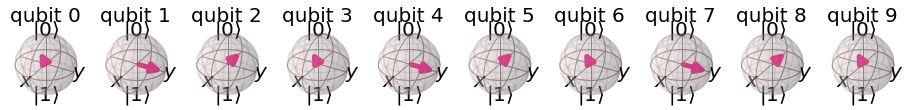

In [15]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

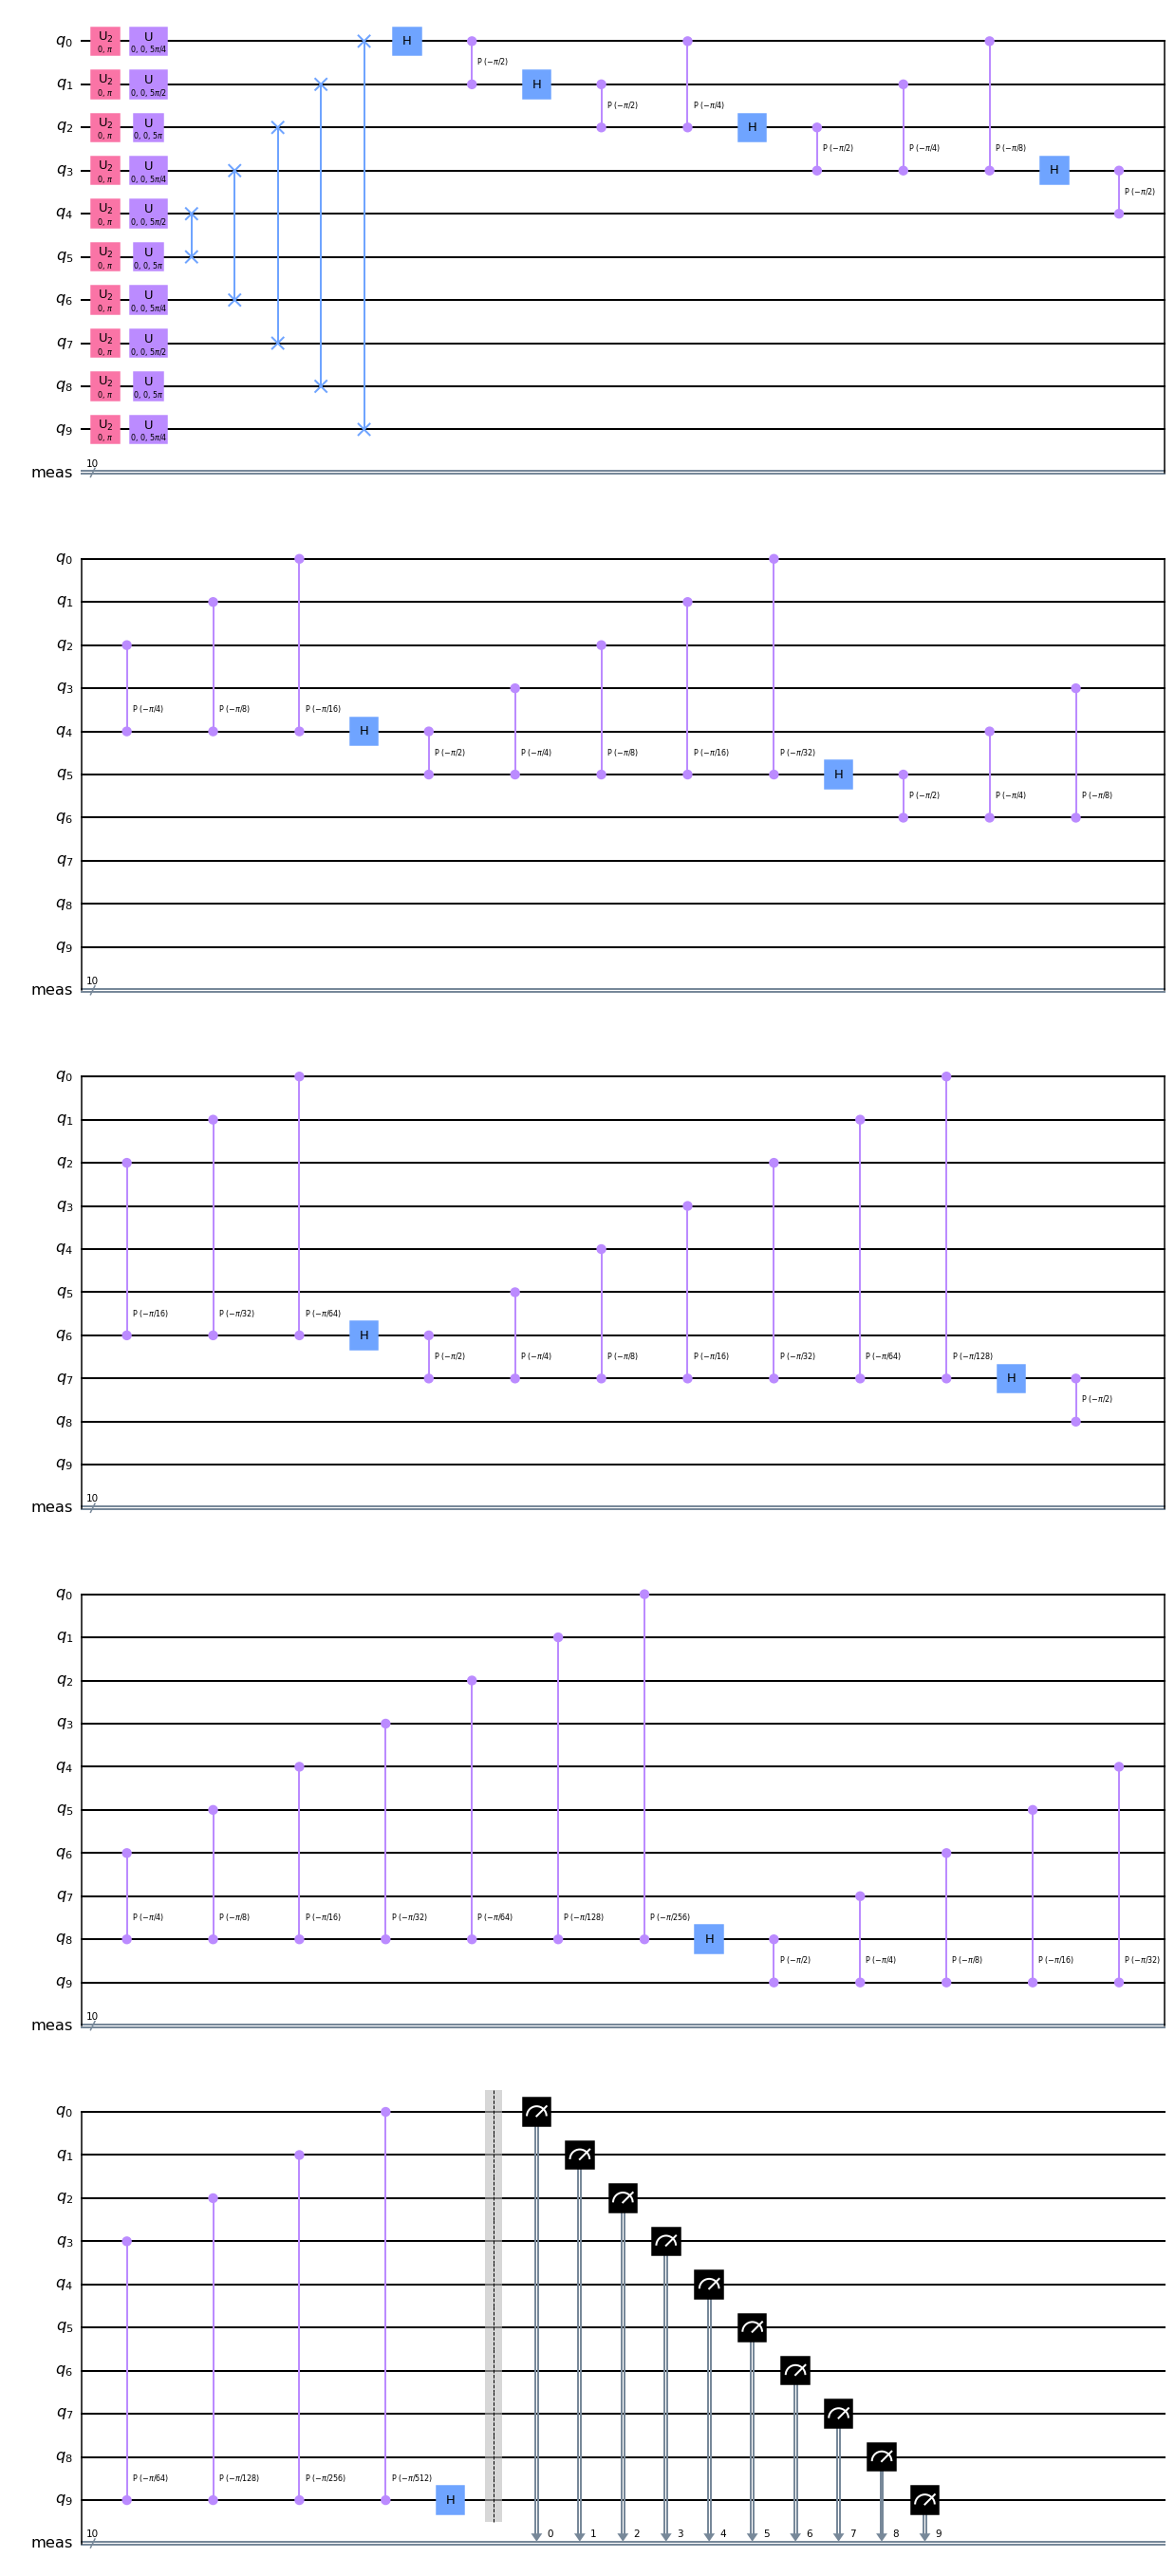

In [16]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

위 그림은 코드들을 최종적으로 구한 것에 대한 결과인 그림이다.
U 게이트들이 10큐비트에 다 적용되도록 만들었고 swap 게이트, p(파이/ㅜ)n이 구현되도록 하였다.
또한 h 게이트들도 일정하게 작동한다.

In [17]:
shots = 2048
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


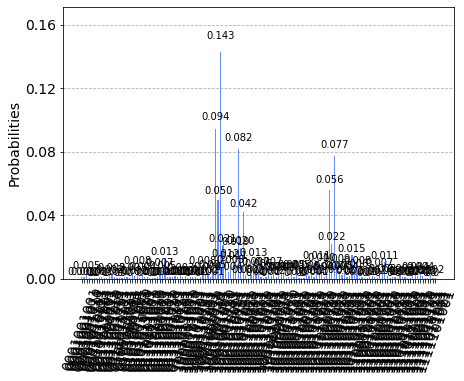

In [18]:
counts = job.result().get_counts()
plot_histogram(counts)

결과를 보기 위해서 counts 코드를 구현하엿고 job이 수행된 결과가 저장하게 한 뒤에 실행되도록 만들었고 그에 따른 그래프이다.
하지만 보는 것이 쉽지 않아서 밑의 print(counts)를 하여서 무슨 값이 나오고 값의 출현도를 출력하도록 하였다.
밑을 보자면 제일 많이 출력되는 것은 '1001001011': 292 이다. 제일 적은 것은 1이다.

In [19]:
print(counts)

{'1110111001': 1, '0010111010': 1, '1111010111': 1, '0111011010': 2, '0001010011': 1, '1010000111': 2, '1010100111': 1, '1001000101': 3, '1001101101': 2, '1010110111': 3, '0001011011': 2, '1011011101': 1, '1111011001': 5, '0111101011': 1, '0111011011': 4, '1101101001': 1, '0101010001': 1, '0111011001': 7, '0110111011': 1, '0011011001': 1, '1101000101': 1, '1111001111': 1, '1100100111': 1, '0001001111': 1, '1111011011': 1, '0101101010': 1, '1010001101': 1, '0111010011': 2, '1110111011': 4, '1101001010': 6, '0111001101': 3, '1101001101': 4, '1101010101': 2, '0111001111': 3, '0011001101': 2, '1101011011': 3, '1010101010': 4, '1010101011': 5, '1100011010': 1, '0011011011': 2, '1010011010': 2, '1111001101': 4, '1111001011': 9, '1011011001': 31, '1001010011': 17, '0101011001': 8, '1001010001': 9, '1011001001': 115, '1000111001': 16, '1001111001': 15, '0011010011': 1, '1001101010': 15, '1001101001': 26, '1011011011': 16, '1010011101': 1, '1111001010': 4, '0110011001': 1, '1001001010': 102, '0